In [3]:
%pip install easyocr
%pip install imutils

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import imutils
import easyocr


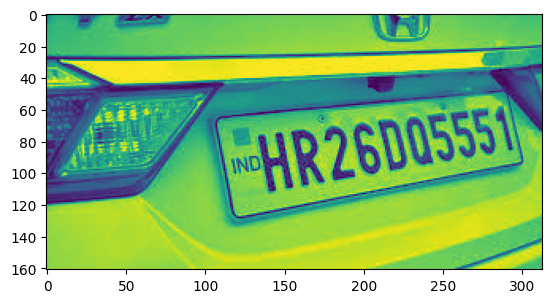

In [21]:
image = cv2.imread("car.jpeg",1)
gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

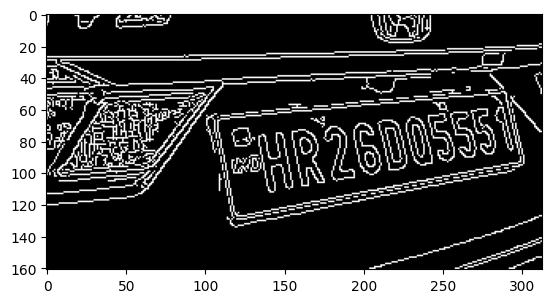

In [22]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [23]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [24]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [25]:
location


array([[[290,  51]],

       [[300,  95]],

       [[118, 124]],

       [[110,  66]]], dtype=int32)

In [27]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)

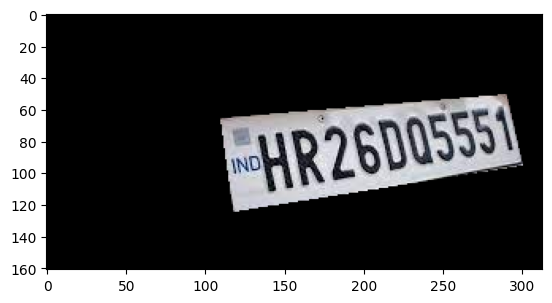

In [28]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [30]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

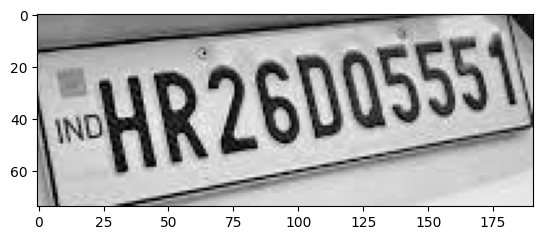

In [31]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [32]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[3, 35], [29, 35], [29, 53], [3, 53]], 'IND', 0.9535971773873007),
 ([[15.771655941875377, 15.429139854688444],
   [181.55560767214516, -0.26610312942763503],
   [183.22834405812463, 51.570860145311556],
   [18.44439232785483, 66.26610312942763]],
  "'HR26DO5551",
  0.355781926405662)]

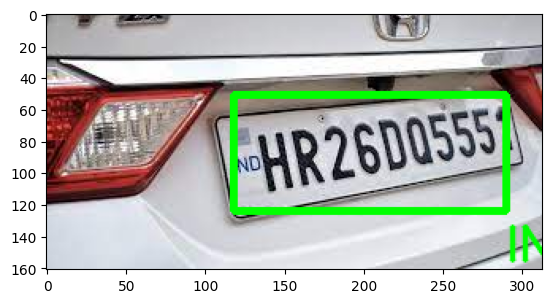

In [35]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))